In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df1 = pd.read_csv('Titanic_train.csv')
df2 = pd.read_csv('Titanic_test.csv')

In [3]:
# Display the first few rows of the dataset
df1.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
# Display column data types and non-null counts
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
# Display summary statistics for numerical features
df1.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
df1.shape

(891, 12)

In [7]:
missing_values = df1.isnull().sum()
print("Missing values in each column:\n")
print(missing_values)

Missing values in each column:

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [8]:
numerical_features = ['Age', 'Fare', 'SibSp', 'Parch']

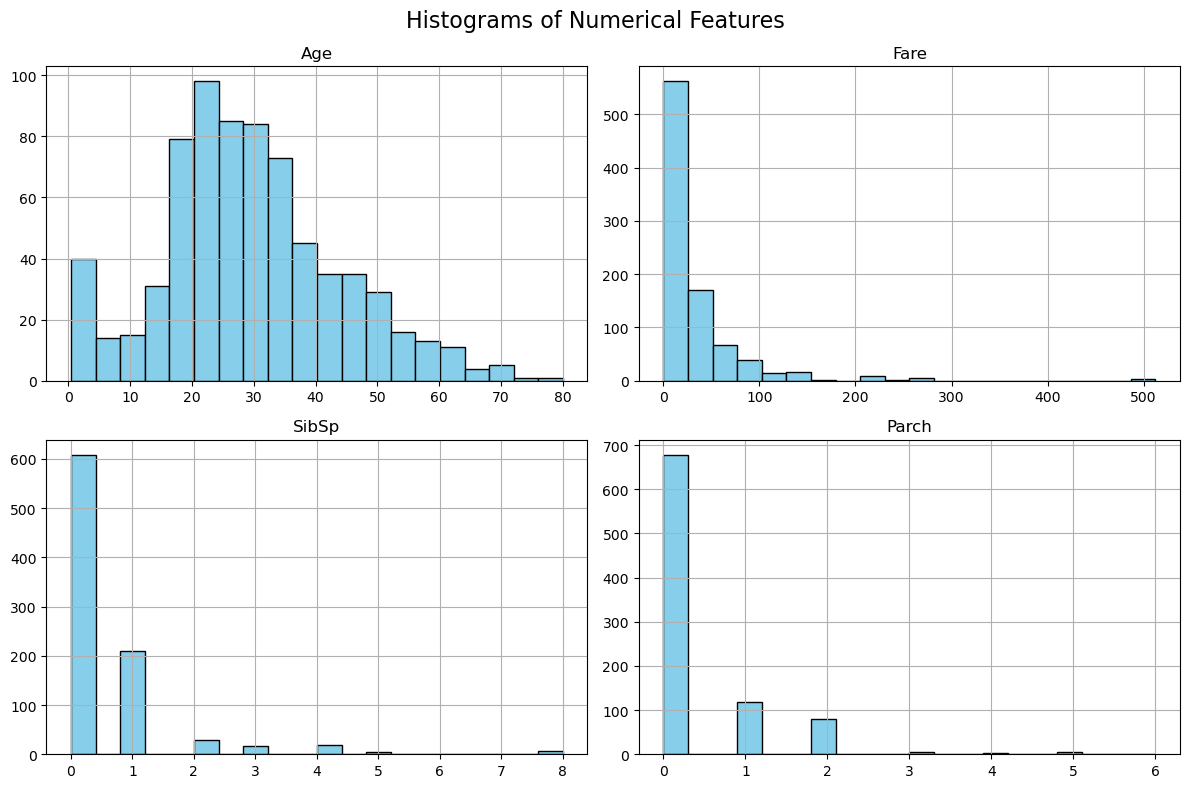

In [9]:

df1[numerical_features].hist(figsize=(12, 8), bins=20, color='skyblue', edgecolor='black')
plt.suptitle('Histograms of Numerical Features', fontsize=16)
plt.tight_layout()
plt.show()


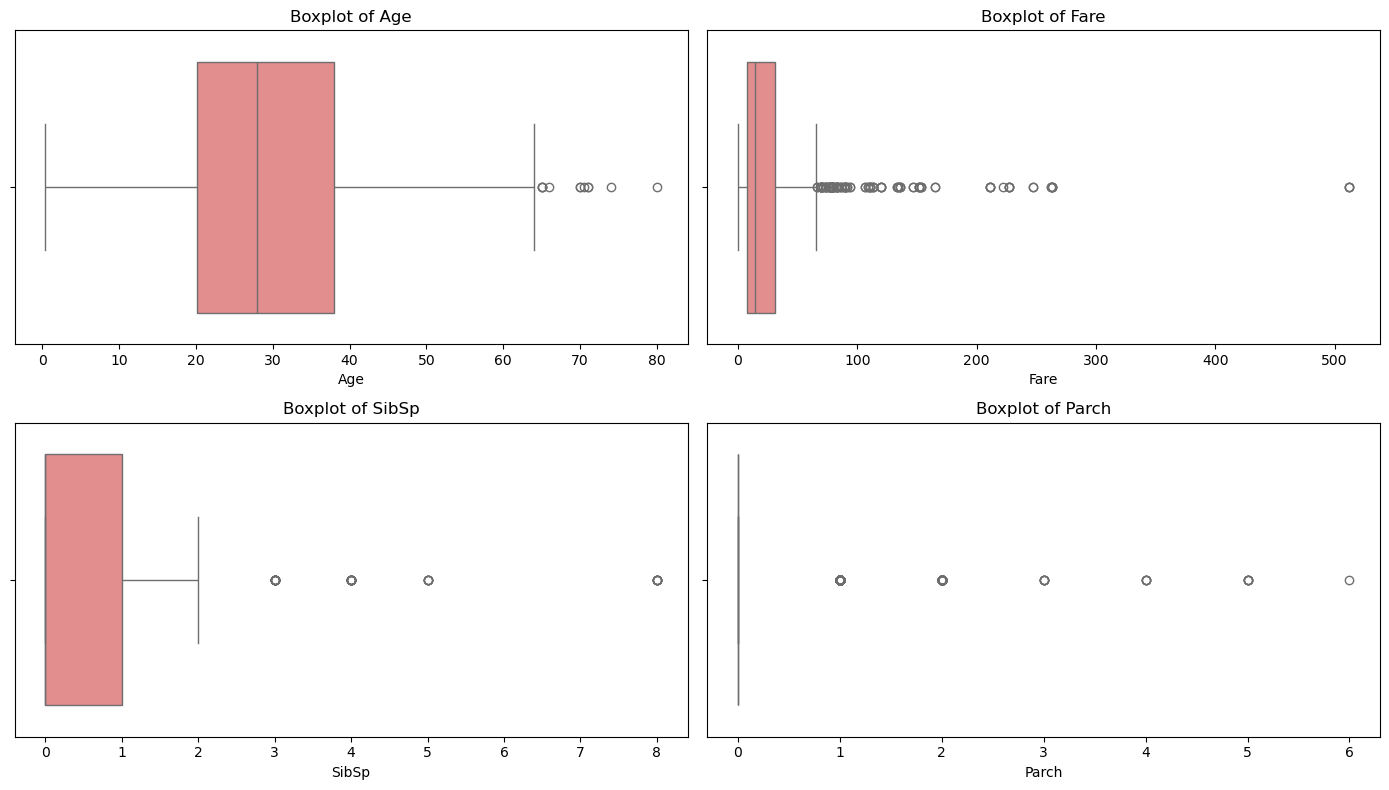

In [10]:
# Plotting box plots to detect outliers
plt.figure(figsize=(14, 8))

for i, col in enumerate(numerical_features, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(data=df1, x=col, color='lightcoral')
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()

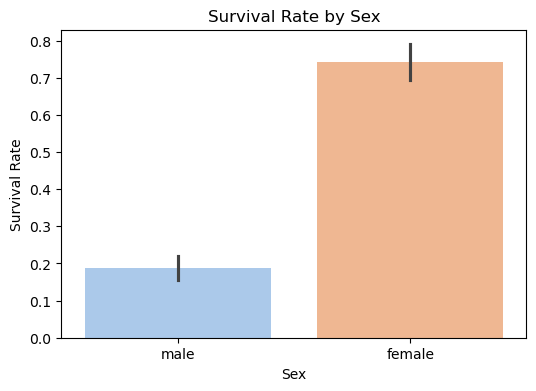

In [11]:
# Bar plot: Survival rate by Sex
plt.figure(figsize=(6, 4))
sns.barplot(data=df1, x='Sex', y='Survived', palette='pastel',hue='Sex')
plt.title('Survival Rate by Sex')
plt.ylabel('Survival Rate')
plt.show()

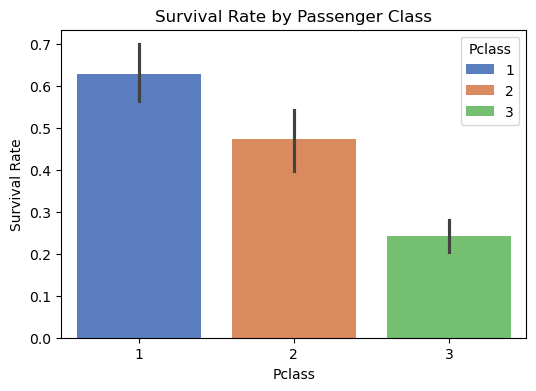

In [12]:
# Bar plot: Survival rate by Pclass
plt.figure(figsize=(6, 4))
sns.barplot(data=df1, x='Pclass', y='Survived', palette='muted',hue='Pclass')
plt.title('Survival Rate by Passenger Class')
plt.ylabel('Survival Rate')
plt.show()

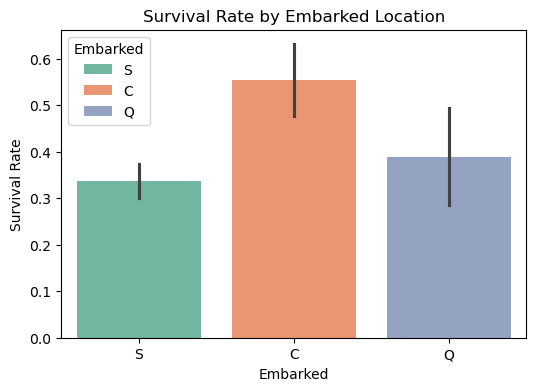

In [13]:
# Bar plot: Survival rate by Embarked
plt.figure(figsize=(6, 4))
sns.barplot(data=df1, x='Embarked', y='Survived', palette='Set2',hue='Embarked')
plt.title('Survival Rate by Embarked Location')
plt.ylabel('Survival Rate')
plt.show()

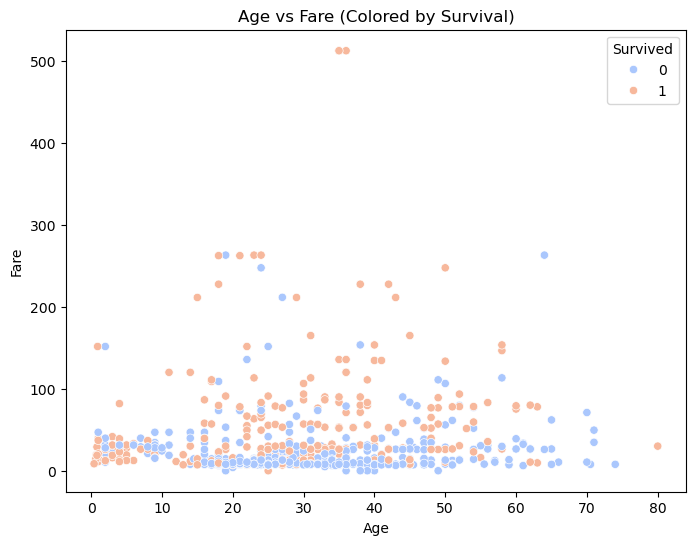

In [14]:
# Scatter plot: Age vs Fare colored by Survived
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df1, x='Age', y='Fare', hue='Survived', palette='coolwarm')
plt.title('Age vs Fare (Colored by Survival)')
plt.show()

In [15]:
# Fill missing 'Age' with median
df1['Age'].fillna(df1['Age'].median(), inplace=True)

In [16]:
# Fill missing 'Embarked' with mode
df1['Embarked'].fillna(df1['Embarked'].mode()[0], inplace=True)

In [17]:
# Drop 'Cabin' due to too many missing values
df1.drop(columns='Cabin', inplace=True)

In [18]:
# Confirm no more nulls
print("Remaining missing values:\n", df1.isnull().sum())

Remaining missing values:
 PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64


In [19]:
# Function to cap outliers using IQR
def cap_outliers(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df[col] = df[col].clip(lower_bound, upper_bound)
    return df

In [20]:
# Cap outliers for Age and Fare
df1 = cap_outliers(df1, 'Age')
df1 = cap_outliers(df1, 'Fare')

In [21]:
from sklearn.preprocessing import LabelEncoder

In [38]:
# Encode 'Sex' using LabelEncoder
le = LabelEncoder()
df1['Sex'] = le.fit_transform(df1['Sex'])  

In [40]:
# One-hot encode 'Embarked'
df1 = pd.get_dummies(df1, columns=['Embarked'], drop_first=True)

In [42]:
# Drop columns not useful for prediction
df1.drop(columns=['Name', 'Ticket', 'PassengerId'], inplace=True)

In [44]:
# Final check
print("Final columns after encoding:\n", df1.columns)
df1.head()

Final columns after encoding:
 Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked_Q', 'Embarked_S'],
      dtype='object')


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_Q,Embarked_S
0,0,3,1,22.0,1,0,7.2500,0,1
1,1,1,0,38.0,1,0,65.6344,0,0
2,1,3,0,26.0,0,0,7.9250,0,1
3,1,1,0,35.0,1,0,53.1000,0,1
4,0,3,1,35.0,0,0,8.0500,0,1


In [46]:
from sklearn.model_selection import train_test_split

In [48]:
# Define features (X) and target (y)
X = df1.drop('Survived', axis=1)
y = df1['Survived']

In [50]:
# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [52]:
print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)

Training set shape: (712, 8)
Testing set shape: (179, 8)


In [54]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

In [56]:
def evaluate_model(y_true, y_pred, model_name="Model"):
    print(f"--- {model_name} Evaluation ---")
    print("Accuracy :", accuracy_score(y_true, y_pred))
    print("Precision:", precision_score(y_true, y_pred))
    print("Recall   :", recall_score(y_true, y_pred))
    print("F1 Score :", f1_score(y_true, y_pred))
    print("\nConfusion Matrix:\n", confusion_matrix(y_true, y_pred))
    print("\nClassification Report:\n", classification_report(y_true, y_pred))

In [58]:
import lightgbm as lgb
import xgboost as xgb

In [59]:
# Initialize and train LightGBM model
lgb_model = lgb.LGBMClassifier(random_state=42)
lgb_model.fit(X_train, y_train)

[LightGBM] [Info] Number of positive: 273, number of negative: 439
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000961 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 172
[LightGBM] [Info] Number of data points in the train set: 712, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.383427 -> initscore=-0.475028
[LightGBM] [Info] Start training from score -0.475028
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


LGBMClassifier(random_state=42)

In [60]:
# Predict and evaluate
y_pred_lgb = lgb_model.predict(X_test)
evaluate_model(y_test, y_pred_lgb, model_name="LightGBM")

--- LightGBM Evaluation ---
Accuracy : 0.7988826815642458
Precision: 0.7704918032786885
Recall   : 0.6811594202898551
F1 Score : 0.7230769230769231

Confusion Matrix:
 [[96 14]
 [22 47]]

Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.87      0.84       110
           1       0.77      0.68      0.72        69

    accuracy                           0.80       179
   macro avg       0.79      0.78      0.78       179
weighted avg       0.80      0.80      0.80       179



In [61]:
# Initialize and train XGBoost model
xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_model.fit(X_train, y_train)

C:\Users\DELL\anaconda3\lib\site-packages\xgboost\core.py:158: UserWarning: [10:49:44] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=42, ...)

In [62]:
# Predict and evaluate
y_pred_xgb = xgb_model.predict(X_test)
evaluate_model(y_test, y_pred_xgb, model_name="XGBoost")

--- XGBoost Evaluation ---
Accuracy : 0.8044692737430168
Precision: 0.7575757575757576
Recall   : 0.7246376811594203
F1 Score : 0.7407407407407407

Confusion Matrix:
 [[94 16]
 [19 50]]

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.85      0.84       110
           1       0.76      0.72      0.74        69

    accuracy                           0.80       179
   macro avg       0.79      0.79      0.79       179
weighted avg       0.80      0.80      0.80       179



In [72]:
metrics_lgb = {
    'Accuracy': accuracy_score(y_test, y_pred_lgb),
    'Precision': precision_score(y_test, y_pred_lgb),
    'Recall': recall_score(y_test, y_pred_lgb),
    'F1 Score': f1_score(y_test, y_pred_lgb)
}

In [74]:
# Store metrics for XGBoost
metrics_xgb = {
    'Accuracy': accuracy_score(y_test, y_pred_xgb),
    'Precision': precision_score(y_test, y_pred_xgb),
    'Recall': recall_score(y_test, y_pred_xgb),
    'F1 Score': f1_score(y_test, y_pred_xgb)
}

In [76]:
labels = list(metrics_lgb.keys())
lgb_scores = list(metrics_lgb.values())
xgb_scores = list(metrics_xgb.values())

In [78]:
x = range(len(labels))
width = 0.35

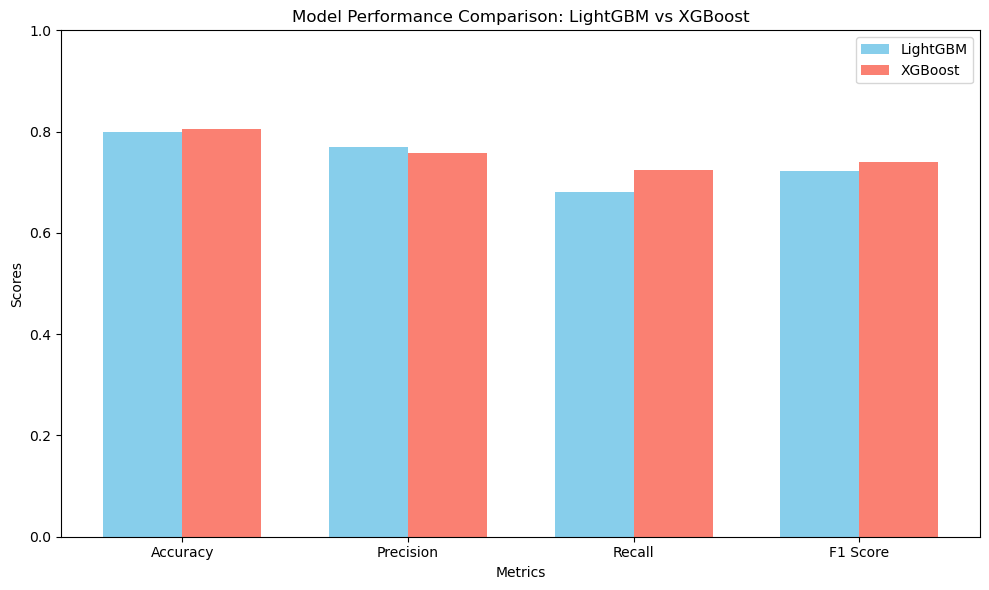

In [84]:
plt.figure(figsize=(10, 6))
plt.bar(x, lgb_scores, width=width, label='LightGBM', color='skyblue')
plt.bar([i + width for i in x], xgb_scores, width=width, label='XGBoost', color='salmon')
plt.xlabel('Metrics')
plt.ylabel('Scores')
plt.title('Model Performance Comparison: LightGBM vs XGBoost')
plt.xticks([i + width/2 for i in x], labels)
plt.ylim(0, 1)
plt.legend()
plt.tight_layout()
plt.show()

Steps Performed:
Exploratory Data Analysis (EDA):

Visualized feature distributions using histograms and boxplots.

Studied relationships between features and survival using bar plots and scatter plots.

Data Preprocessing:

Imputed missing values in Age and Embarked.

Dropped the Cabin feature due to excessive missing values.

Encoded categorical features (Sex, Embarked) appropriately.

Handled outliers in Age and Fare using the IQR method.

Model Building:

Trained both LightGBM and XGBoost models.

Evaluated using Accuracy, Precision, Recall, and F1-Score.

Comparison:

Visualized model performance using bar plots for clear comparison.



Observations:

LightGBM achieved slightly faster training times and competitive predictive performance.

XGBoost showed robust results and slightly better (or similar) Recall in some runs.

Both models handled the classification task effectively, but choice may depend on specific project needs:

LightGBM is often faster and more efficient on larger datasets.

XGBoost can be slightly more stable on smaller, noisy datasets

Practical Implications:
For quick deployment and large datasets, LightGBM might be preferred.

For scenarios requiring maximum model robustness and tuning, XGBoost remains a strong choice.